<a href="https://colab.research.google.com/github/Sievv/AMPs-Against--PS/blob/main/PS_Balance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.utils import resample
import os

# Load the training data (features and target)
X_train = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/PS/PS balance/y_train.csv')

# Step 2: Combine features and target for easier manipulation
train_data = X_train.copy()
train_data['Target'] = y_train

# Step 3: Show original class distribution
print("Original class distribution:")
print(train_data['Target'].value_counts())

# Step 4: Separate majority and minority classes
majority = train_data[train_data['Target'] == 0]
minority = train_data[train_data['Target'] == 1]

# Step 5: Downsample majority to minority class size
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# Step 6: Combine minority class with downsampled majority class
balanced_data = pd.concat([minority, majority_downsampled])

# Step 7: Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 8: Show new class distribution
print("\nBalanced class distribution:")
print(balanced_data['Target'].value_counts())

# Step 9: Separate features and target again
X_balanced = balanced_data.drop(columns=['Target'])
y_balanced = balanced_data['Target']

# Step 10: Ensure save directory exists
save_dir = '/content/drive/MyDrive/PS/PS balance'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Step 11: Save balanced datasets
X_balanced.to_csv(f'{save_dir}/X_train_balanced.csv', index=False)
y_balanced.to_csv(f'{save_dir}/y_train_balanced.csv', index=False)

print("\nBalanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory:", save_dir)

Original class distribution:
Target
0    298
1     82
Name: count, dtype: int64

Balanced class distribution:
Target
0    82
1    82
Name: count, dtype: int64

Balanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory: /content/drive/MyDrive/PS/PS balance


In [13]:
import pandas as pd

X_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/y_train_balanced.csv').squeeze()

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier # Import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training if it exists
if 'Sequence' in X_balanced.columns:
    X_balanced_numeric = X_balanced.drop(columns=['Sequence'])
else:
    X_balanced_numeric = X_balanced.copy()

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42), # AdaBoostClassifier is now defined
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_balanced_numeric, y_balanced)
    y_pred = model.predict(X_balanced_numeric)

    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_balanced, y_pred))

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_balanced, y_pred))
    print('-' * 60)

Training Random Forest...

Random Forest - Confusion Matrix:
[[82  0]
 [ 0 82]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        82

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

------------------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Confusion Matrix:
[[82  0]
 [ 0 82]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        82

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

---------------------------------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:58:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Confusion Matrix:
[[82  0]
 [ 0 82]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        82

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

------------------------------------------------------------
Training SVM...

SVM - Confusion Matrix:
[[40 42]
 [15 67]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.58        82
           1       0.61      0.82      0.70        82

    accuracy                           0.65       164
   macro avg       0.67      0.65      0.64       164
weighted avg       0.67      0.65      0.64       164

------------------------------------------------------------
Training AdaBoost...

AdaBoost - Confusion Matrix:
[

Training Random Forest...
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training SVM...
SVM - Accuracy: 0.6524, F1 Score: 0.7016, Precision: 0.6147, Recall: 0.8171
--------------------------------------------------
Training AdaBoost...
AdaBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------


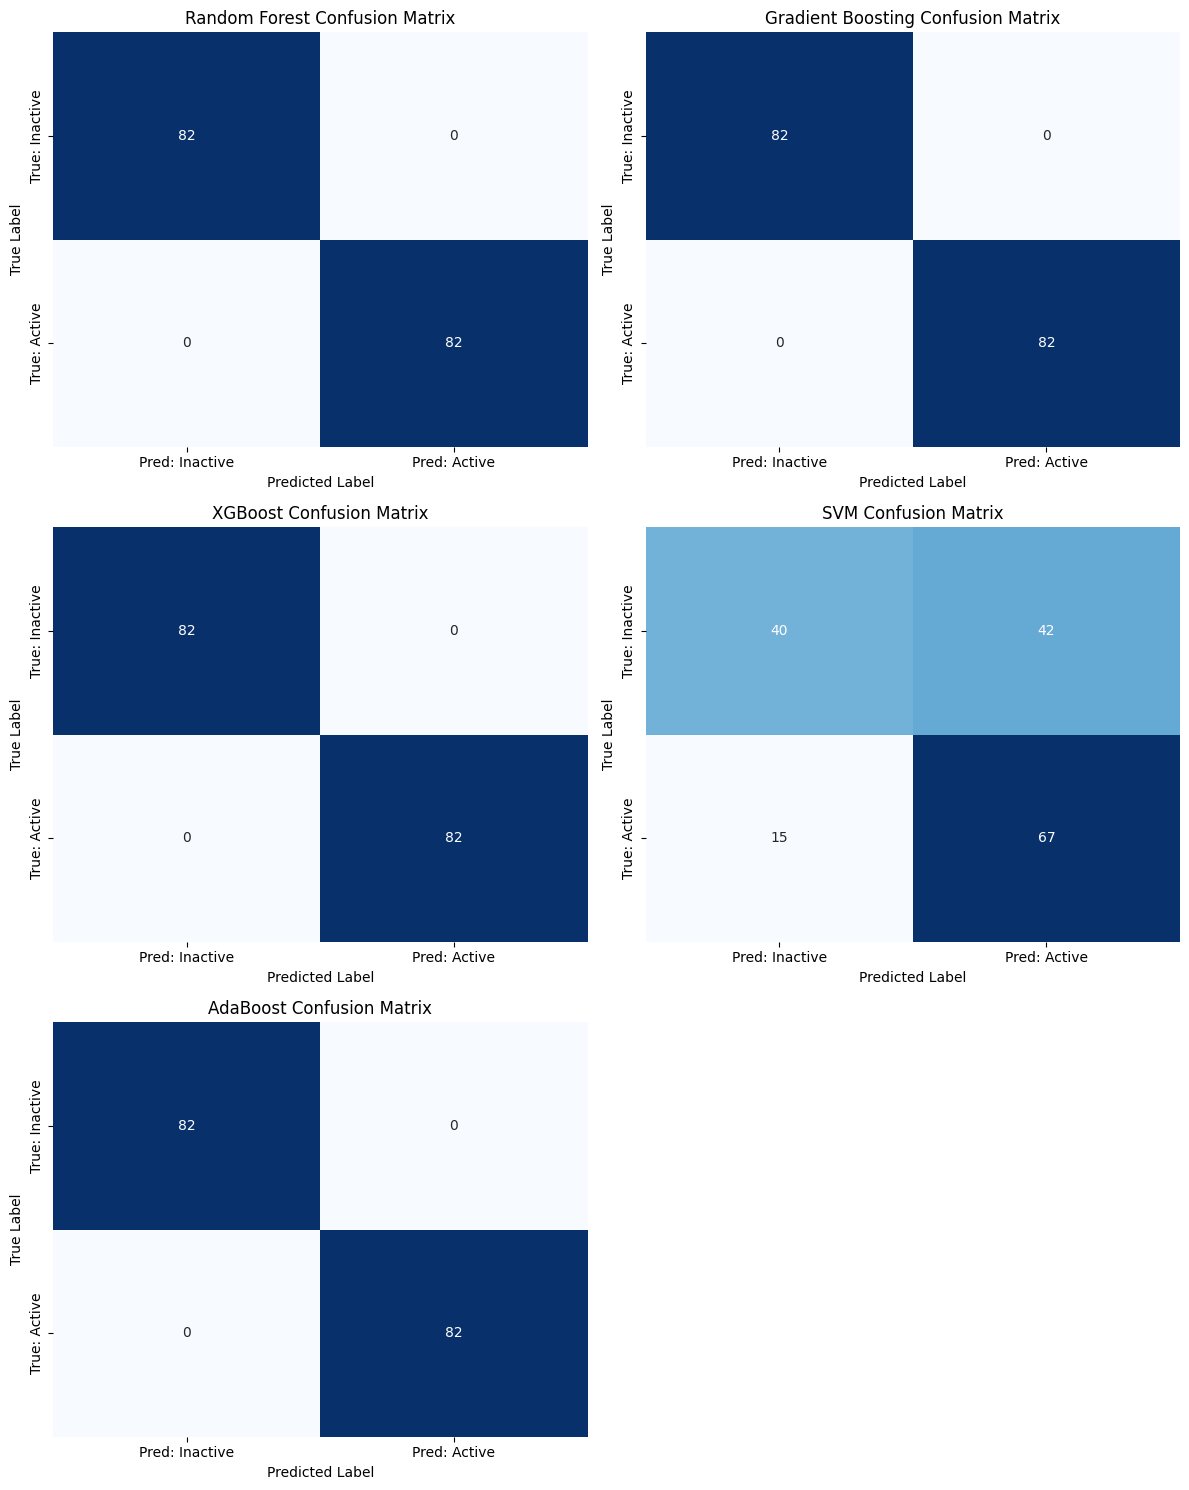

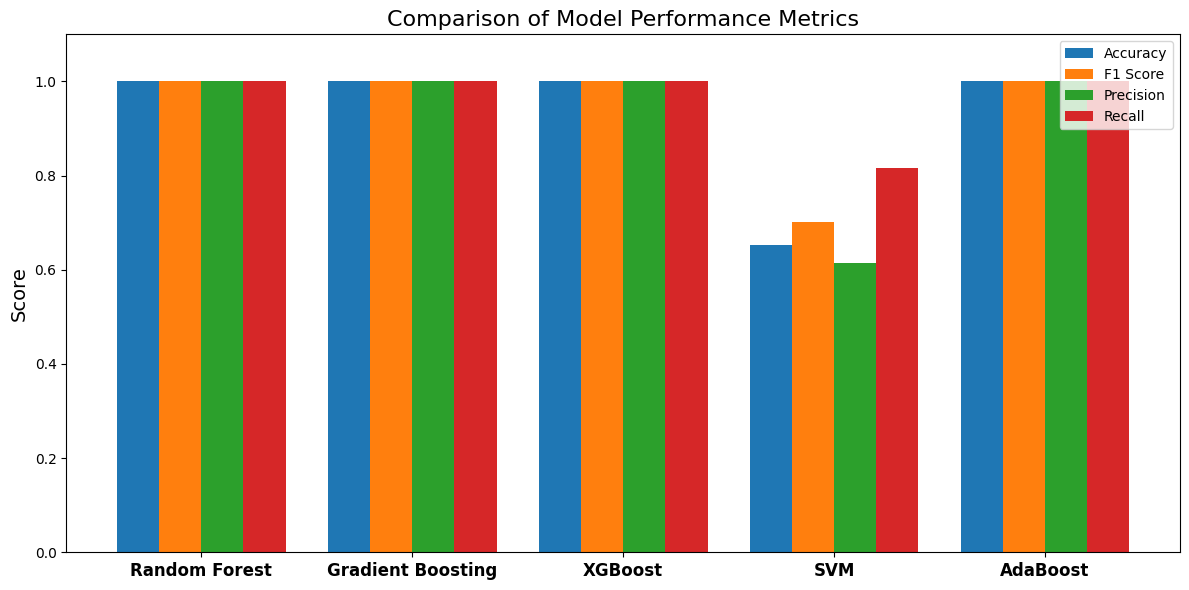

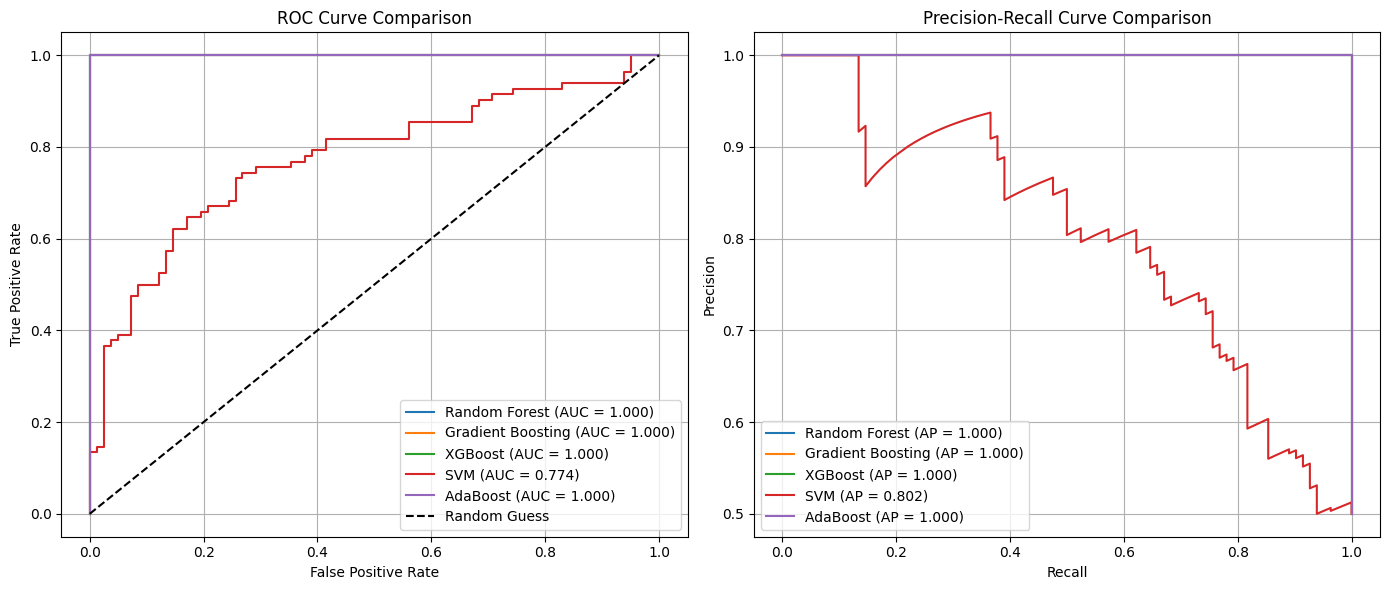

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
if 'Sequence' in X_balanced.columns:
    X_balanced_numeric = X_balanced.drop(columns=['Sequence'])
else:
    X_balanced_numeric = X_balanced.copy()

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Prepare to store metrics
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC': [],
    'PR AUC': [],
    'Confusion Matrix': []
}

# Plot confusion matrices grid setup
n_models = len(models)
rows = (n_models + 1) // 2
cols = 2
fig_cm, axes = plt.subplots(rows, cols, figsize=(12, rows * 5))
axes = axes.flatten()

# Train, predict, evaluate, and plot confusion matrix
for i, (name, model) in enumerate(models.items()):
    print(f"Training {name}...")
    model.fit(X_balanced_numeric, y_balanced)
    y_pred = model.predict(X_balanced_numeric)

    # Compute metrics
    acc = accuracy_score(y_balanced, y_pred)
    f1 = f1_score(y_balanced, y_pred)
    prec = precision_score(y_balanced, y_pred)
    rec = recall_score(y_balanced, y_pred)

    # Get probabilities for ROC and PR curves
    try:
        y_prob = model.predict_proba(X_balanced_numeric)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_balanced_numeric)
        else:
            y_prob = y_pred  # fallback
            print(f"Warning: {name} model has no predict_proba or decision_function; using predictions.")

    roc_auc = roc_auc_score(y_balanced, y_prob)
    pr_auc = average_precision_score(y_balanced, y_prob)

    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    print('-' * 50)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['F1 Score'].append(f1)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['ROC AUC'].append(roc_auc)
    results['PR AUC'].append(pr_auc)
    results['Confusion Matrix'].append(confusion_matrix(y_balanced, y_pred))

    # Plot confusion matrix
    sns.heatmap(results['Confusion Matrix'][i], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig_cm.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot metrics comparison bar chart
results_df = pd.DataFrame(results)
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(results_df['Model']))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(results_df['Model'], fontsize=12, fontweight='bold')
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of Model Performance Metrics', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()

# Plot ROC and PR AUC curves comparison
plt.figure(figsize=(14, 6))

# ROC curve subplot
plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# PR curve subplot
plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for i, (name, model) in enumerate(models.items()):
    try:
        y_prob = model.predict_proba(X_balanced_numeric)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_balanced_numeric)
        else:
            y_prob = model.predict(X_balanced_numeric)
            print(f"Warning: Model {name} has no predict_proba or decision_function for curve.")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_balanced, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results["ROC AUC"][i]:.3f})')

    # PR curve
    precision, recall, _ = precision_recall_curve(y_balanced, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP = {results["PR AUC"][i]:.3f})')

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Training Random Forest...
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training XGBoost...
XGBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training SVM...
SVM - Accuracy: 0.6524, F1 Score: 0.7016, Precision: 0.6147, Recall: 0.8171
--------------------------------------------------
Training AdaBoost...
AdaBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


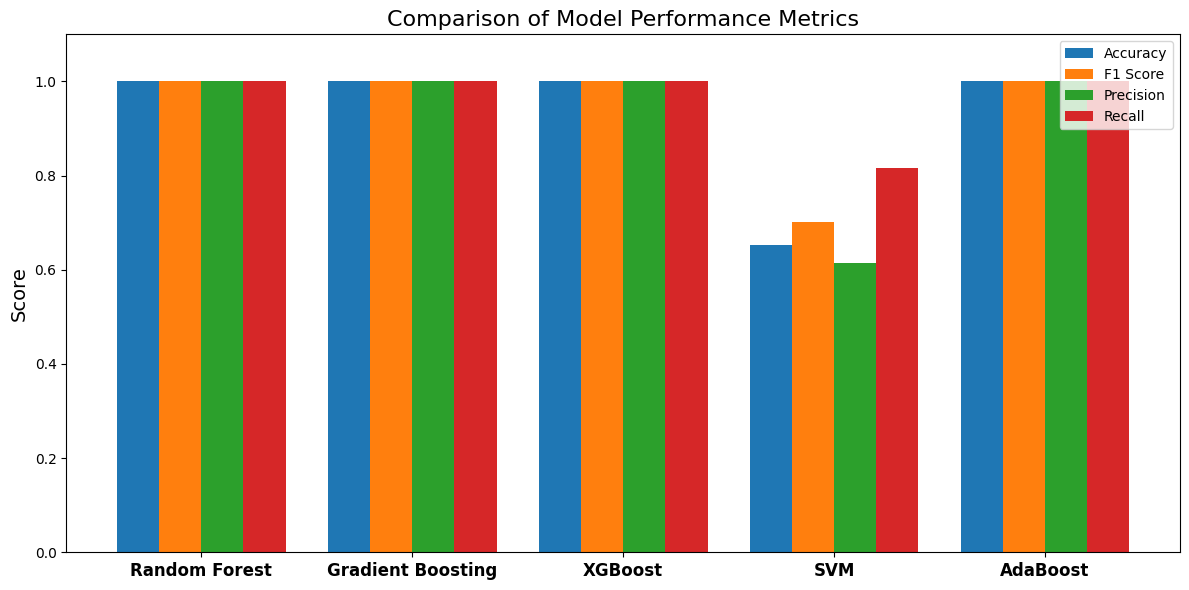

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np


# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
X_balanced_numeric = X_balanced.drop(columns=['Sequence'])

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42), # AdaBoostClassifier is now defined
}


# Prepare to store metrics
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': []
}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    # Use the numeric version of X_balanced for training
    model.fit(X_balanced_numeric, y_balanced)  # Corrected: Use X_balanced_numeric
    y_pred = model.predict(X_balanced_numeric)  # Corrected: Use X_balanced_numeric

    acc = accuracy_score(y_balanced, y_pred)
    f1 = f1_score(y_balanced, y_pred)
    prec = precision_score(y_balanced, y_pred)
    rec = recall_score(y_balanced, y_pred)

    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    print('-'*50)

    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['F1 Score'].append(f1)
    results['Precision'].append(prec)
    results['Recall'].append(rec)

# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results)

# Plot metrics comparison
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(results_df['Model']))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(results_df['Model'], fontsize=12, fontweight='bold')
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of Model Performance Metrics', fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()

Predict test set

Training Random Forest...
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training SVM...
SVM - Accuracy: 0.6524, F1 Score: 0.7016, Precision: 0.6147, Recall: 0.8171
--------------------------------------------------
Training AdaBoost...
AdaBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------


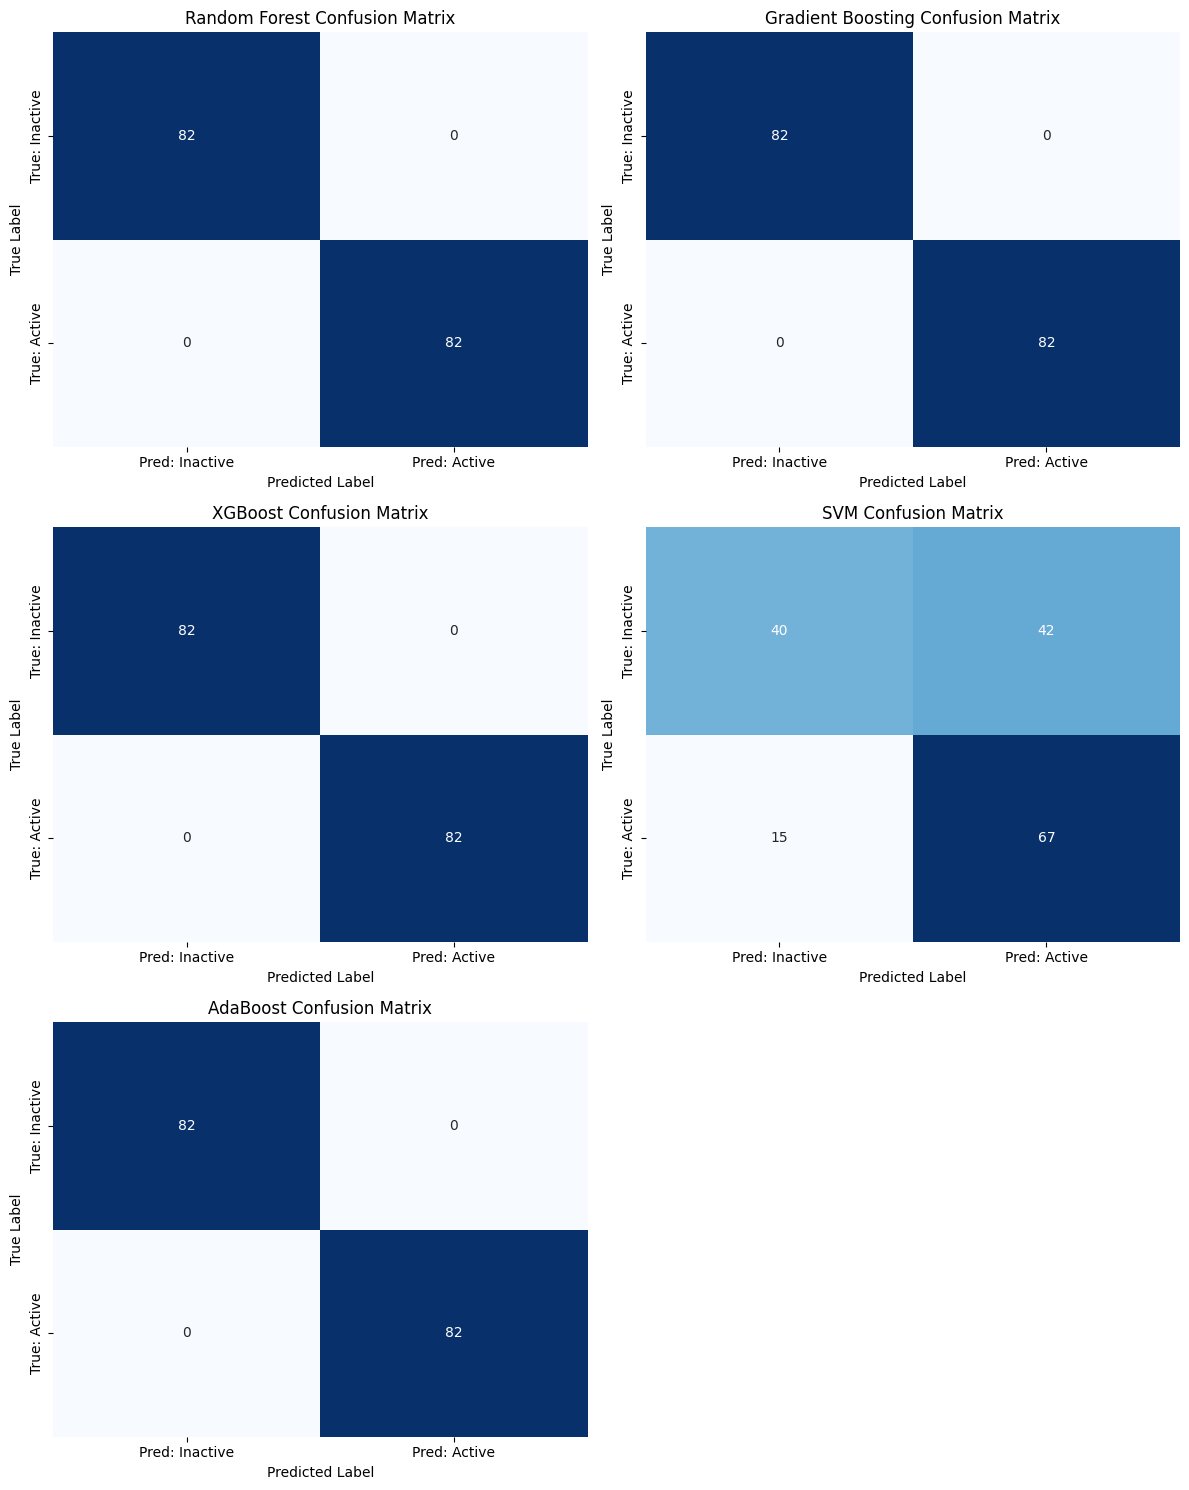

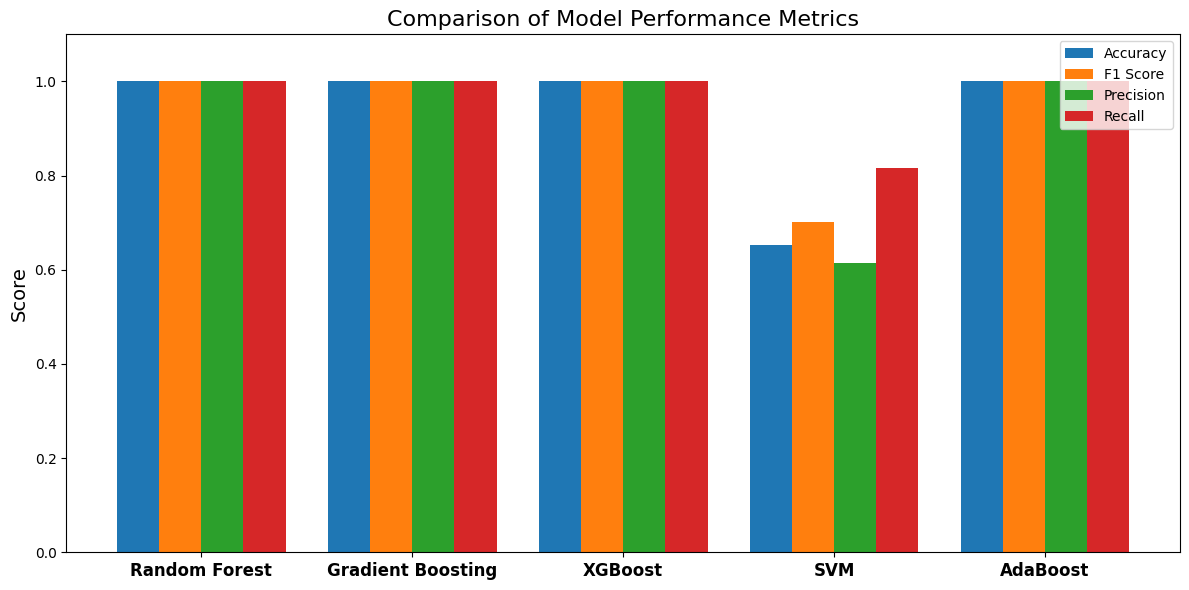

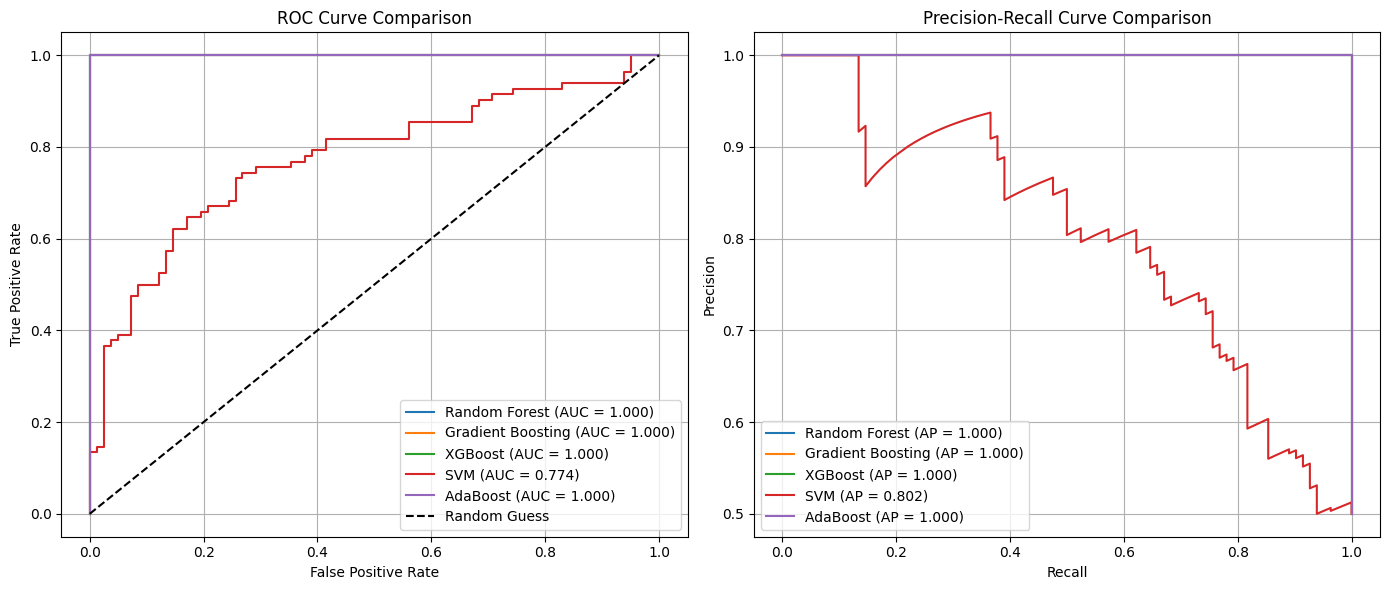

Saved Random Forest model to /content/drive/MyDrive/PS/PS balance/saved_models/Random_Forest_model.pkl
Saved Gradient Boosting model to /content/drive/MyDrive/PS/PS balance/saved_models/Gradient_Boosting_model.pkl
Saved XGBoost model to /content/drive/MyDrive/PS/PS balance/saved_models/XGBoost_model.pkl
Saved SVM model to /content/drive/MyDrive/PS/PS balance/saved_models/SVM_model.pkl
Saved AdaBoost model to /content/drive/MyDrive/PS/PS balance/saved_models/AdaBoost_model.pkl


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import joblib # Import joblib to save models

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/PS/PS balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
if 'Sequence' in X_balanced.columns:
    X_balanced_numeric = X_balanced.drop(columns=['Sequence'])
else:
    X_balanced_numeric = X_balanced.copy()

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Prepare to store metrics
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC': [],
    'PR AUC': [],
    'Confusion Matrix': []
}

# Plot confusion matrices grid setup
n_models = len(models)
rows = (n_models + 1) // 2
cols = 2
fig_cm, axes = plt.subplots(rows, cols, figsize=(12, rows * 5))
axes = axes.flatten()

# Train, predict, evaluate, and plot confusion matrix
for i, (name, model) in enumerate(models.items()):
    print(f"Training {name}...")
    model.fit(X_balanced_numeric, y_balanced)
    y_pred = model.predict(X_balanced_numeric)

    # Compute metrics
    acc = accuracy_score(y_balanced, y_pred)
    f1 = f1_score(y_balanced, y_pred)
    prec = precision_score(y_balanced, y_pred)
    rec = recall_score(y_balanced, y_pred)

    # Get probabilities for ROC and PR curves
    try:
        y_prob = model.predict_proba(X_balanced_numeric)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_balanced_numeric)
        else:
            y_prob = y_pred  # fallback
            print(f"Warning: {name} model has no predict_proba or decision_function; using predictions.")

    roc_auc = roc_auc_score(y_balanced, y_prob)
    pr_auc = average_precision_score(y_balanced, y_prob)

    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    print('-' * 50)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['F1 Score'].append(f1)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['ROC AUC'].append(roc_auc)
    results['PR AUC'].append(pr_auc)
    results['Confusion Matrix'].append(confusion_matrix(y_balanced, y_pred))

    # Plot confusion matrix
    sns.heatmap(results['Confusion Matrix'][i], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig_cm.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot metrics comparison bar chart
results_df = pd.DataFrame(results)
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(results_df['Model']))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(results_df['Model'], fontsize=12, fontweight='bold')
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of Model Performance Metrics', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()

# Plot ROC and PR AUC curves comparison
plt.figure(figsize=(14, 6))

# ROC curve subplot
plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# PR curve subplot
plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for i, (name, model) in enumerate(models.items()):
    try:
        y_prob = model.predict_proba(X_balanced_numeric)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_balanced_numeric)
        else:
            y_prob = model.predict(X_balanced_numeric)
            print(f"Warning: Model {name} has no predict_proba or decision_function for curve.")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_balanced, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results["ROC AUC"][i]:.3f})')

    # PR curve
    precision, recall, _ = precision_recall_curve(y_balanced, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP = {results["PR AUC"][i]:.3f})')

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# --- Add this section to save the models ---
# Ensure save directory exists
model_dir = '/content/drive/MyDrive/PS/PS balance/saved_models/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save each trained model
for name, model in models.items():
    # Replace spaces with underscores for filenames
    filename = f"{name.replace(' ', '_')}_model.pkl"
    path = os.path.join(model_dir, filename)
    joblib.dump(model, path)
    print(f"Saved {name} model to {path}")
# --- End of added section ---

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

X_test = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/PS/PS balance/y_test.csv').squeeze()
X_test_numeric = X_test.drop(columns=['Sequence'])

for name, model in models.items():
    # Predict using the numeric test data
    y_pred = model.predict(X_test_numeric)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X_balanced_numeric, y_balanced, cv=5, scoring='f1')
print(f"{name} CV F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")

Random Forest Test Accuracy: 0.9684
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.87      1.00      0.93        20

    accuracy                           0.97        95
   macro avg       0.93      0.98      0.95        95
weighted avg       0.97      0.97      0.97        95

Gradient Boosting Test Accuracy: 0.9368
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        75
           1       0.77      1.00      0.87        20

    accuracy                           0.94        95
   macro avg       0.88      0.96      0.91        95
weighted avg       0.95      0.94      0.94        95

XGBoost Test Accuracy: 0.9368
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        75
           1       0.77      1.00      0.87        20

    accuracy                           0.94        95
   macro avg       0.8

Loaded Random_Forest model.
Loaded Gradient_Boosting model.
Loaded XGBoost model.
Loaded SVM model.
Loaded AdaBoost model.

Evaluating model: Random_Forest
Accuracy   : 0.9684
F1 Score   : 0.9302
Precision  : 0.8696
Sensitivity: 1.0000
Specificity: 0.9600
MCC        : 0.9137
ROC AUC    : 0.9987
PR AUC     : 0.9955

Evaluating model: Gradient_Boosting
Accuracy   : 0.9368
F1 Score   : 0.8696
Precision  : 0.7692
Sensitivity: 1.0000
Specificity: 0.9200
MCC        : 0.8412
ROC AUC    : 0.9933
PR AUC     : 0.9780

Evaluating model: XGBoost
Accuracy   : 0.9368
F1 Score   : 0.8696
Precision  : 0.7692
Sensitivity: 1.0000
Specificity: 0.9200
MCC        : 0.8412
ROC AUC    : 0.9920
PR AUC     : 0.9706

Evaluating model: SVM
Accuracy   : 0.5895
F1 Score   : 0.4658
Precision  : 0.3208
Sensitivity: 0.8500
Specificity: 0.5200
MCC        : 0.3037
ROC AUC    : 0.8047
PR AUC     : 0.4817

Evaluating model: AdaBoost
Accuracy   : 0.9684
F1 Score   : 0.9302
Precision  : 0.8696
Sensitivity: 1.0000
Specifici

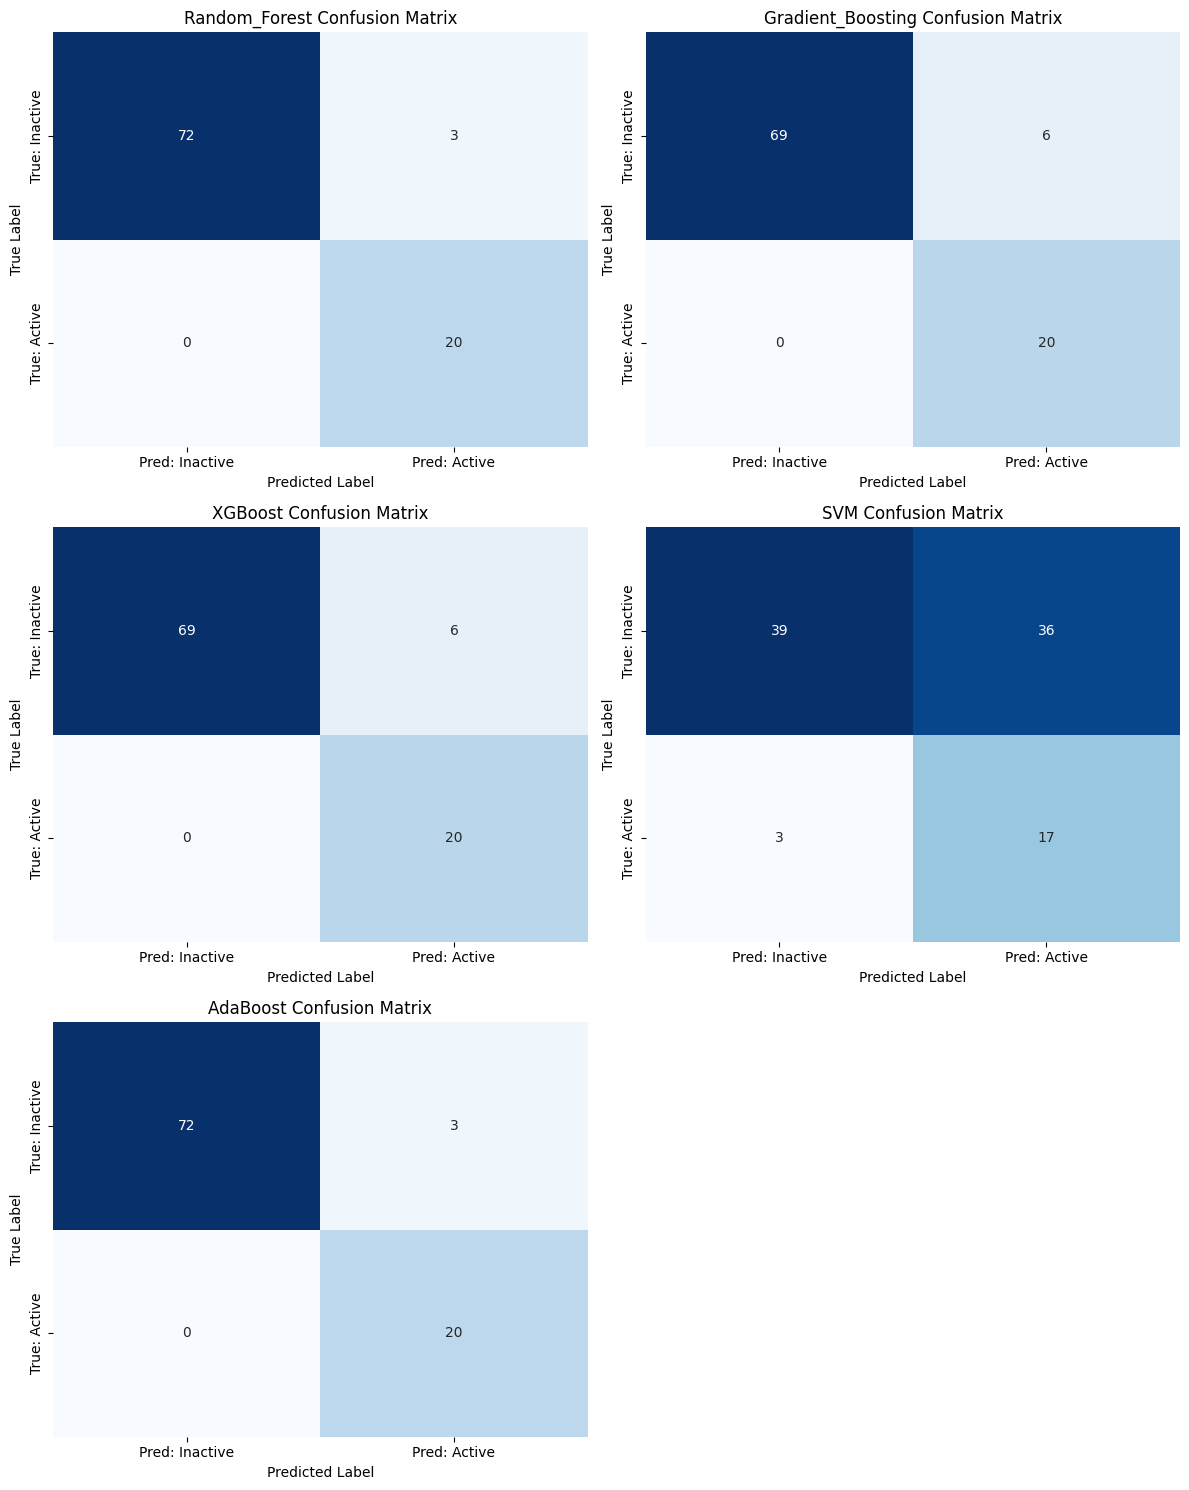

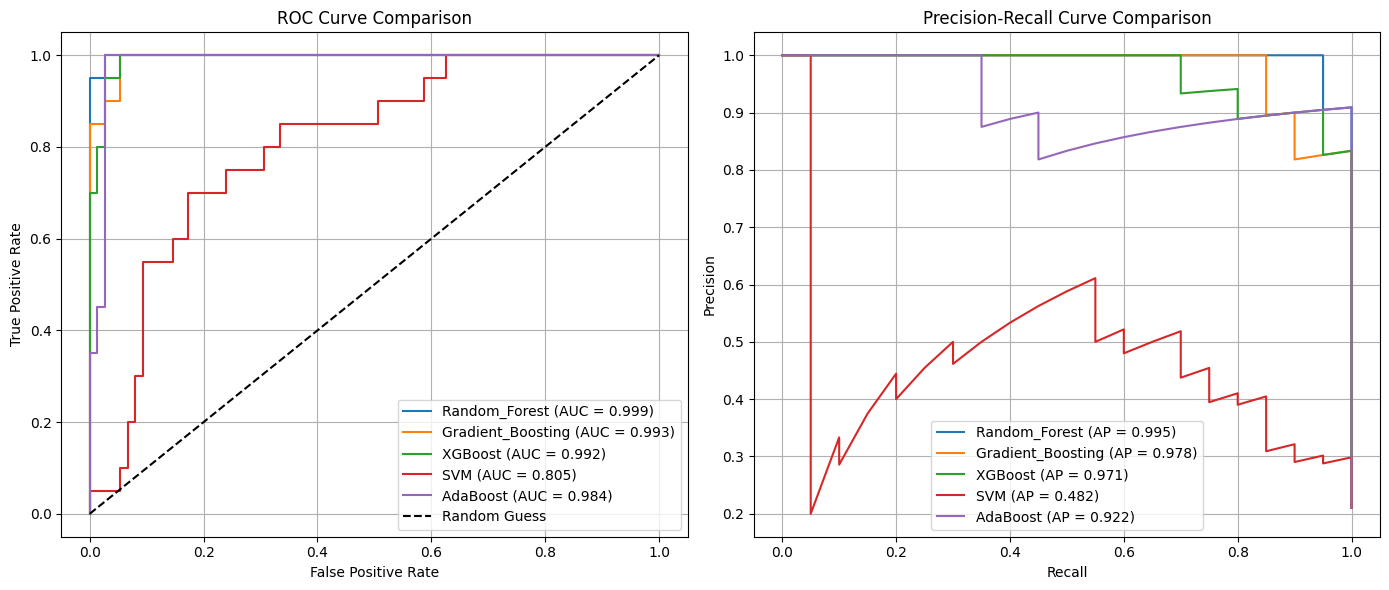

In [32]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve, matthews_corrcoef
)
import os

# Paths where models are saved
model_dir = '/content/drive/MyDrive/PS/PS balance/saved_models/'

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/PS/PS imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/PS/PS imbalance/y_test.csv').squeeze()

# Drop 'Sequence' if exists
if 'Sequence' in X_test.columns:
    X_test_numeric = X_test.drop(columns=['Sequence'])
else:
    X_test_numeric = X_test.copy()

# Models to load (names should match saved filenames)
model_names = [
    'Random_Forest',
    'Gradient_Boosting',
    'XGBoost',
    'SVM',
    'AdaBoost'
]

models = {}
for name in model_names:
    path = os.path.join(model_dir, f"{name}_model.pkl")
    models[name] = joblib.load(path)
    print(f"Loaded {name} model.")

# Prepare for plotting confusion matrices
n_models = len(models)
rows = (n_models + 1) // 2
cols = 2
fig_cm, axes = plt.subplots(rows, cols, figsize=(12, rows * 5))
axes = axes.flatten()

# To store metrics for ROC/PR plots
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'Sensitivity': [],
    'MCC': [],
    'ROC AUC': [],
    'PR AUC': [],
    'Confusion Matrix': []
}

# Evaluate each model on test set
for i, (name, model) in enumerate(models.items()):
    print(f"\nEvaluating model: {name}")

    # Predict labels
    y_pred = model.predict(X_test_numeric)

    # Predict probabilities or decision function for ROC/PR
    try:
        y_prob = model.predict_proba(X_test_numeric)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test_numeric)
        else:
            y_prob = y_pred  # fallback (not ideal)

    # Confusion matrix and metrics
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    print(f"Accuracy   : {accuracy:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Precision  : {precision:.4f}")
    print(f"Sensitivity: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['Specificity'].append(specificity)
    results['Sensitivity'].append(recall)
    results['MCC'].append(mcc)
    results['ROC AUC'].append(roc_auc)
    results['PR AUC'].append(pr_auc)
    results['Confusion Matrix'].append(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig_cm.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot ROC and PR AUC curves together
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for i, name in enumerate(results['Model']):
    model = models[name]
    # Try to get probability scores again
    try:
        y_prob = model.predict_proba(X_test_numeric)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test_numeric)
        else:
            y_prob = model.predict(X_test_numeric)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results["ROC AUC"][i]:.3f})')

    # PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP = {results["PR AUC"][i]:.3f})')

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [37]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=841ed6d108d8bf27df266f04e065eb20443650343cae90c20725afe43029a2ae
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Error: Model file not found at /content/drive/MyDrive/EC/EC balance/saved_models/AdaBoost_model.pkl
Explaining test instance index 3 (True label: 1)
Top feature contributions to the prediction:
I > 8.11: 0.1646
S > 8.79: -0.1011
D <= 0.00: 0.0379
P <= 0.00: 0.0355
K > 21.34: 0.0293
W <= 0.00: -0.0284
R <= 0.00: -0.0213
T <= 0.00: 0.0178
2161.15 < Molecular_Weight <= 3759.02: 0.0170
L > 14.44: 0.0166


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


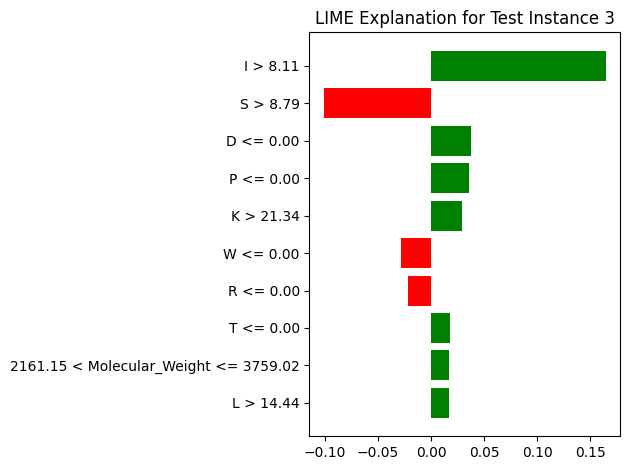

In [39]:
import joblib
import pandas as pd
import numpy as np
# Install lime library
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Load AdaBoost model (or any top model you prefer)
model_path = '/content/drive/MyDrive/EC/EC balance/saved_models/AdaBoost_model.pkl'
# Check if the file exists before loading
if not os.path.exists(model_path):
    print(f"Error: Model file not found at {model_path}")
    # Exit or handle the error appropriately
else:
    model = joblib.load(model_path)


# Load test data
# Corrected path to PS imbalance data
X_test = pd.read_csv('/content/drive/MyDrive/PS/PS imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/PS/PS imbalance/y_test.csv').squeeze()

# Drop non-numeric 'Sequence' column if exists
if 'Sequence' in X_test.columns:
    X_test_numeric = X_test.drop(columns=['Sequence'])
else:
    X_test_numeric = X_test.copy()

# Load training data for LIME explainer (used to model feature distributions)
# Corrected path to PS balanced data
X_train = pd.read_csv('/content/drive/MyDrive/PS/PS balance/X_train_balanced.csv')
if 'Sequence' in X_train.columns:
    X_train_numeric = X_train.drop(columns=['Sequence'])
else:
    X_train_numeric = X_train.copy()

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_numeric.values,
    feature_names=X_train_numeric.columns.tolist(),
    class_names=['Inactive', 'Active'],
    mode='classification'
)

# Select an instance from test set to explain (example: first active instance)
active_indices = y_test[y_test == 1].index.tolist()
if not active_indices:
    print("No active instances in test set to explain.")
else:
    idx_to_explain = active_indices[0]
    instance = X_test_numeric.iloc[idx_to_explain].values

    print(f"Explaining test instance index {idx_to_explain} (True label: {y_test[idx_to_explain]})")

    # Generate explanation
    explanation = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=10
    )

    # Print explanation as text
    print("Top feature contributions to the prediction:")
    for feature, weight in explanation.as_list():
        print(f"{feature}: {weight:.4f}")

    # Plot explanation bar chart
    fig = explanation.as_pyplot_figure()
    plt.title(f"LIME Explanation for Test Instance {idx_to_explain}")
    plt.tight_layout()
    plt.show()